<a href="https://colab.research.google.com/github/mo-geabel/Analysis-earthquakes-in-Turkiye/blob/main/T_Earthquake_Analizes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# 📊 Data manipulation and numerical operations
import numpy as np                  # Used for numerical operations, arrays, and NaN handling
import pandas as pd                 # Used for data analysis and manipulation with DataFrames


from scipy.stats import ttest_ind   # Used to perform an independent two-sample t-test to compare the means of two groups
from scipy.stats import f_oneway    # Used to perform a one-way ANOVA test to compare the means of three or more independent groups

# 📦 KaggleHub for loading datasets directly from Kaggle (if available)
import kagglehub
from kagglehub import KaggleDatasetAdapter  # Used to specify the dataset format (e.g., Pandas)

# 📈 Visualization
import seaborn as sns               # Used for advanced and beautiful statistical plotting
import matplotlib.pyplot as plt     # Core plotting library for creating charts and graphs

# 🔢 Machine Learning - Models and Evaluation
from sklearn.linear_model import LinearRegression          # Basic regression model
from sklearn.model_selection import train_test_split       # Splits data into training/testing sets
from sklearn.impute import SimpleImputer                   # Handles missing values in features
from sklearn.metrics import mean_squared_error, r2_score   # Evaluation metrics: RMSE, R²

# 🌲 Advanced ML Models
from sklearn.ensemble import RandomForestRegressor         # Ensemble learning model using decision trees
from xgboost import XGBRegressor                           # High-performance gradient boosting model

# 🗺️ Geospatial Mapping
import folium                               # Used for interactive maps (based on Leaflet.js)
from folium.plugins import MarkerCluster    # Clusters map markers to avoid overlap


##  Data Cleaning and Analyzing  

In [2]:

# Assuming your CSV file is in 'My Drive/data/your_file.csv'
file_path = 'https://raw.githubusercontent.com/mo-geabel/Analysis-earthquakes-in-Turkiye/refs/heads/main/veriler.csv'  # Replace with your file path


df = pd.read_csv(file_path)
print(df.head()) # Display first few rows of the dataframe



   No         Deprem Kodu Olus tarihi  Olus zamani    Enlem   Boylam  Der(km)  \
0       1  20230731215338  2023.07.31  21:53:38.29  37.4153  37.1703      4.0   
1       2  20230731152316  2023.07.31  15:23:16.85  38.1413  38.4340      5.2   
2       3  20230731025049  2023.07.31  02:50:49.84  37.8352  26.8353      6.2   
3       4  20230730201940  2023.07.30  20:19:40.49  40.8085  31.0183      5.3   
4       5  20230730161352  2023.07.30  16:13:52.62  38.1290  38.1863      2.4   

    xM   MD   ML   Mw   Ms   Mb Tip  \
0  3.5  0.0  3.5  3.4  0.0  0.0  Ke   
1  3.5  0.0  3.5  3.4  0.0  0.0  Ke   
2  3.0  0.0  3.0  0.0  0.0  0.0  Ke   
3  3.1  0.0  3.1  3.1  0.0  0.0  Ke   
4  3.0  0.0  3.0  0.0  0.0  0.0  Ke   

                                                 Yer  
0     DOGANLI-PAZARCIK (KAHRAMANMARAS) [East 1.3 km]  
1               AKSU-SINCIK (ADIYAMAN) [West 6.4 km]  
2                           SISAM ADASI (EGE DENIZI)  
3       ICMELER-GOLYAKA (DUZCE) [South East  0.7 km]  
4  

In [3]:
df.isnull().sum()


,0
No,0
Deprem Kodu,0
Olus tarihi,0
Olus zamani,0
Enlem,0
Boylam,0
Der(km),0
xM,0
MD,0
ML,0


In [5]:
df.head()

,No,Deprem Kodu,Olus tarihi,Olus zamani,Enlem,Boylam,Der(km),xM,MD,ML,Mw,Ms,Mb,Tip,Yer
0,1,20230731215338,2023.07.31,21:53:38.29,37.4153,37.1703,4.0,3.5,0.0,3.5,3.4,0.0,0.0,Ke,DOGANLI-PAZARCIK (KAHRAMANMARAS) [East 1.3 km]
1,2,20230731152316,2023.07.31,15:23:16.85,38.1413,38.4340,5.2,3.5,0.0,3.5,3.4,0.0,0.0,Ke,AKSU-SINCIK (ADIYAMAN) [West 6.4 km]
2,3,20230731025049,2023.07.31,02:50:49.84,37.8352,26.8353,6.2,3.0,0.0,3.0,0.0,0.0,0.0,Ke,SISAM ADASI (EGE DENIZI)
3,4,20230730201940,2023.07.30,20:19:40.49,40.8085,31.0183,5.3,3.1,0.0,3.1,3.1,0.0,0.0,Ke,ICMELER-GOLYAKA (DUZCE) [South East 0.7 km]
4,5,20230730161352,2023.07.30,16:13:52.62,38.1290,38.1863,2.4,3.0,0.0,3.0,0.0,0.0,0.0,Ke,CAMPINAR-CELIKHAN (ADIYAMAN) [North West 4.3 km]


In [6]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           50000 non-null  int64  
 1   Deprem Kodu  50000 non-null  int64  
 2   Olus tarihi  50000 non-null  object 
 3   Olus zamani  50000 non-null  object 
 4   Enlem        50000 non-null  float64
 5   Boylam       50000 non-null  float64
 6   Der(km)      50000 non-null  float64
 7   xM           50000 non-null  float64
 8   MD           50000 non-null  float64
 9   ML           50000 non-null  float64
 10  Mw           12922 non-null  float64
 11  Ms           50000 non-null  float64
 12  Mb           50000 non-null  float64
 13  Tip          50000 non-null  object 
 14  Yer          50000 non-null  object 
dtypes: float64(9), int64(2), object(4)
memory usage: 5.7+ MB
None


In [7]:
df.describe()

,No,Deprem Kodu,Enlem,Boylam,Der(km),xM,MD,ML,Mw,Ms,Mb
count,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,12922.000000,50000.000000,50000.000000
mean,25000.500000,2.009237e+13,38.300424,32.963727,9.995948,3.344862,1.921914,1.464486,2.877171,0.001400,0.051334
std,14433.901067,7.962870e+10,1.464283,5.746905,12.580761,0.395971,1.613644,1.732178,1.409761,0.087321,0.472931
min,1.000000,1.994091e+13,35.000000,26.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12500.750000,2.004022e+13,37.192725,27.820000,5.000000,3.100000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,25000.500000,2.008111e+13,38.360000,30.880000,6.900000,3.200000,3.000000,0.000000,3.300000,0.000000,0.000000
75%,37500.250000,2.015102e+13,39.267550,38.025100,10.500000,3.500000,3.200000,3.200000,3.700000,0.000000,0.000000
max,50000.000000,2.023073e+13,41.998200,44.999200,154.700000,7.700000,6.700000,7.500000,7.700000,6.400000,5.800000


In [11]:
df.isnull().sum()


,0
No,0
Deprem Kodu,0
Olus tarihi,0
Olus zamani,0
Enlem,0
Boylam,0
Der(km),0
xM,0
MD,0
ML,0


**Rows with missing Yer (location) values were deleted, as location data is not essential for the model’s prediction and has no impact on the core features used in the analysis**

In [13]:

# Replace empty strings, whitespace-only strings, and variations of "nan" with actual np.nan
df.replace([r'^\s*$', 'NAN', 'nan', 'NaN'], np.nan, regex=True, inplace=True)

df.isnull().sum()


**Approximately 74% of the Mw (Moment Magnitude) values are missing in the dataset. Since Mw is a critical indicator of earthquake severity and energy release, imputing these values accurately is essential for any meaningful seismic analysis.**

In [15]:
df = df[df['Yer'].notnull()]
df.isnull().sum()


,0
No,0
Deprem Kodu,0
Olus tarihi,0
Olus zamani,0
Enlem,0
Boylam,0
Der(km),0
xM,0
MD,0
ML,0


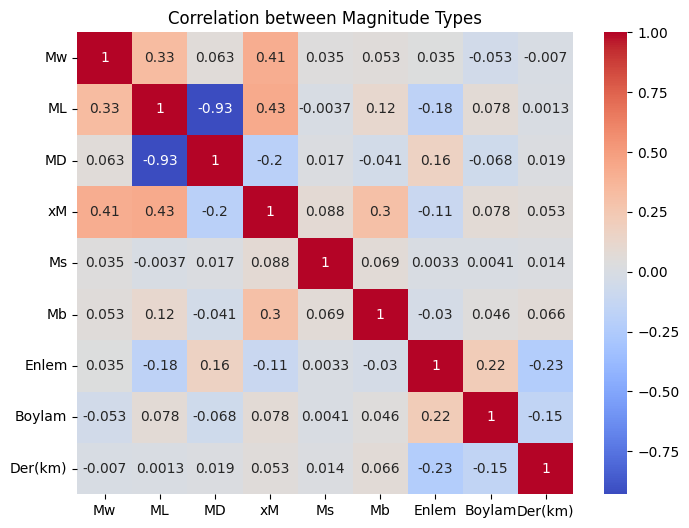

In [16]:


# Select only numerical columns related to magnitude
magnitude_cols = ['Mw', 'ML', 'MD', 'xM', 'Ms', 'Mb','Enlem','Boylam','Der(km)']

# Compute correlation matrix
corr = df[magnitude_cols].corr()

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation between Magnitude Types")
plt.show()


We can see xm,ML and MD have strong relation with Mw so we can pick them to train our model

            Der(km)            xM            MD            ML            Mw  \
count  49860.000000  49860.000000  49860.000000  49860.000000  12900.000000   
mean      10.003568      3.345068      1.921039      1.465491      2.877465   
std       12.587928      0.396158      1.613940      1.732364      1.409886   
min        0.000000      3.000000      0.000000      0.000000      0.000000   
25%        5.000000      3.100000      0.000000      0.000000      3.000000   
50%        6.900000      3.200000      3.000000      0.000000      3.300000   
75%       10.500000      3.500000      3.200000      3.200000      3.700000   
max      154.700000      7.700000      6.700000      7.500000      7.700000   

                 Ms            Mb  
count  49860.000000  49860.000000  
mean       0.001404      0.051300  
std        0.087444      0.472761  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  


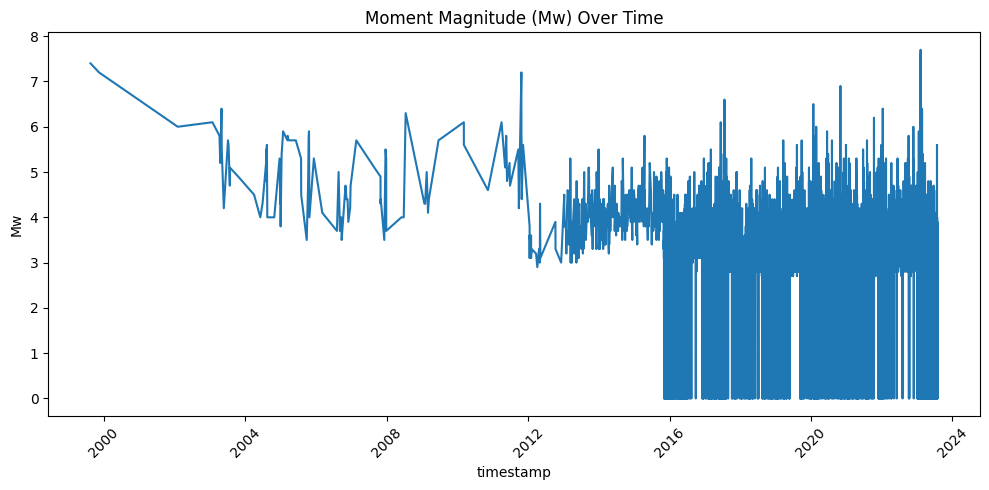

In [17]:

# Convert date and time
df['timestamp'] = pd.to_datetime(df['Olus tarihi'] + ' ' + df['Olus zamani'])

# Summary statistics
print(df[['Der(km)', 'xM', 'MD', 'ML', 'Mw', 'Ms', 'Mb']].describe())
plt.figure(figsize=(10, 5))
sns.lineplot(x='timestamp', y='Mw', data=df)
plt.title('Moment Magnitude (Mw) Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Given the strong correlation between Mw (Moment Magnitude) and the features ML,xM and MD, a machine learning regression model was proposed to predict the missing Mw values. This approach leverages the relationship among magnitude scales to generate reliable estimates for over 74% of the dataset where Mw was originally missing.**

A RandomForestRegressor algorithm was initially used to train the model, leveraging its ability to handle non-linear relationships and feature interactions effectively. This served as a baseline to evaluate the performance of more advanced models for predicting the missing Mw values.

In [18]:
df['Mw'] = pd.to_numeric(df['Mw'], errors='coerce')
df['ML'] = pd.to_numeric(df['ML'], errors='coerce')
df['xM'] = pd.to_numeric(df['xM'], errors='coerce')
df['MD'] = pd.to_numeric(df['MD'], errors='coerce')

# Filter for training: keep only rows with non-null Mw, ML, xM
train_df = df[['Mw', 'ML', 'xM','MD']].dropna()
train_df = train_df[train_df['Mw'] != 0]  # Optional: remove zeros

# Define features and target
X = train_df[['ML', 'xM','MD']]
y = train_df['Mw']

# Split into training/test to evaluate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ R² Score: {r2:.4f}")
print(f"✅ Approx. Accuracy: {r2 * 100:.2f}%")

✅ RMSE: 0.0744
✅ R² Score: 0.9796
✅ Approx. Accuracy: 97.96%


In [19]:

# Step 1: Ensure data is numeric
df['Mw'] = pd.to_numeric(df['Mw'], errors='coerce')
df['ML'] = pd.to_numeric(df['ML'], errors='coerce')
df['xM'] = pd.to_numeric(df['xM'], errors='coerce')
df['MD'] = pd.to_numeric(df['MD'], errors='coerce')

# Step 2: Keep only rows with valid Mw, ML, xM
features = ['ML', 'xM','MD']
df_sample = df[features + ['Mw']].dropna()
df_sample = df_sample[df_sample['Mw'] != 0]

X = df_sample[features]
y = df_sample['Mw']

# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train XGBoost Regressor
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ R² Score: {r2:.4f}")
print(f"✅ Accuracy: {r2 * 100:.2f}%")


✅ RMSE: 0.0745
✅ R² Score: 0.9795
✅ Accuracy: 97.95%


Filling predicted values into another copy of the data set

In [20]:
# Step 0: Make a deep copy of the original DataFrame
df_filled = df.copy()

# Step 1: Identify rows where Mw is missing but ML and xM are available
mask = df_filled['Mw'].isnull() & df_filled['ML'].notnull() & df_filled['xM'].notnull()& df_filled['MD'].notnull()

# Step 2: Prepare features for prediction
X_missing = df_filled.loc[mask, ['ML', 'xM','MD']]

# Step 3: Predict missing Mw using the trained model (e.g., XGBoost)
predicted_mw = model.predict(X_missing)

# Step 4: Fill in the missing Mw values in the copy
df_filled.loc[mask, 'Mw'] = predicted_mw

# Optional: Add a flag column
df_filled['Mw_predicted'] = False
df_filled.loc[mask, 'Mw_predicted'] = True

print(f"✅ Filled {len(predicted_mw)} missing Mw values in the copied DataFrame.")


✅ Filled 36960 missing Mw values in the copied DataFrame.


            Der(km)            xM            MD            ML            Mw  \
count  49860.000000  49860.000000  49860.000000  49860.000000  49860.000000   
mean      10.003568      3.345068      1.921039      1.465491      3.163267   
std       12.587928      0.396158      1.613940      1.732364      0.785893   
min        0.000000      3.000000      0.000000      0.000000      0.000000   
25%        5.000000      3.100000      0.000000      0.000000      3.000000   
50%        6.900000      3.200000      3.000000      0.000000      3.200025   
75%       10.500000      3.500000      3.200000      3.200000      3.400000   
max      154.700000      7.700000      6.700000      7.500000      7.700000   

                 Ms            Mb  
count  49860.000000  49860.000000  
mean       0.001404      0.051300  
std        0.087444      0.472761  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  


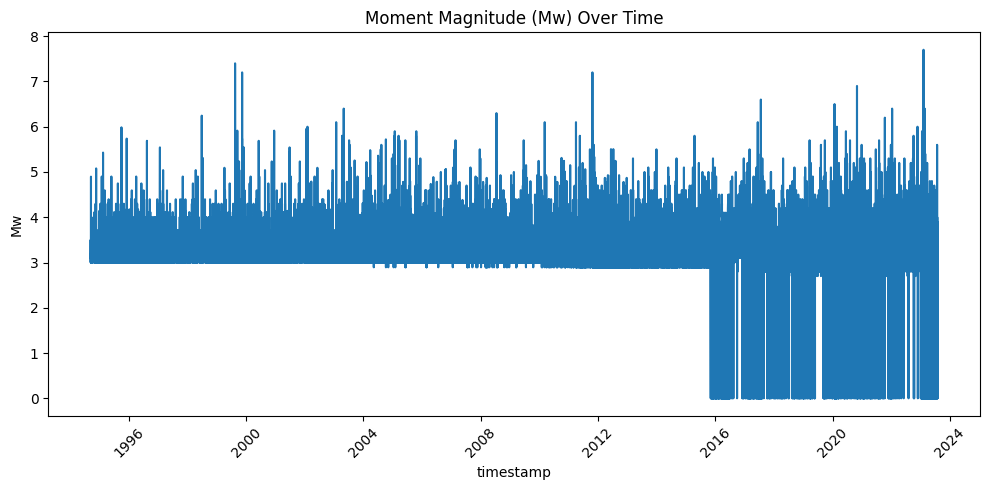

In [29]:

# Convert date and time
df_filled['timestamp'] = pd.to_datetime(df_filled['Olus tarihi'] + ' ' + df_filled['Olus zamani'])

# Summary statistics
print(df_filled[['Der(km)', 'xM', 'MD', 'ML', 'Mw', 'Ms', 'Mb']].describe())
plt.figure(figsize=(10, 5))
sns.lineplot(x='timestamp', y='Mw', data=df_filled)
plt.title('Moment Magnitude (Mw) Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

expected result as training 26% to get 74% of missing values

In [30]:
print(df_filled[df_filled['Mw_predicted'] == True]['Mw'].describe())


count    36960.000000
mean         3.263020
std          0.317789
min          2.893624
25%          2.999910
50%          3.200025
75%          3.399986
max          6.244492
Name: Mw, dtype: float64


# Comparing between Mw orignal and predicted

In [31]:
original_mw = df_filled[df_filled['Mw_predicted'] == False]
predicted_mw = df_filled[df_filled['Mw_predicted'] == True]
print("Original Correlation:")
print(original_mw[['Mw', 'ML', 'xM', 'Der(km)']].corr())

print("\nPredicted Correlation:")
print(predicted_mw[['Mw', 'ML', 'xM', 'Der(km)']].corr())


Original Correlation:
               Mw        ML        xM   Der(km)
Mw       1.000000  0.334854  0.413100 -0.007043
ML       0.334854  1.000000  0.921030  0.039383
xM       0.413100  0.921030  1.000000  0.044606
Der(km) -0.007043  0.039383  0.044606  1.000000

Predicted Correlation:
               Mw        ML        xM   Der(km)
Mw       1.000000  0.245368  0.992184  0.072806
ML       0.245368  1.000000  0.325719  0.026278
xM       0.992184  0.325719  1.000000  0.073015
Der(km)  0.072806  0.026278  0.073015  1.000000


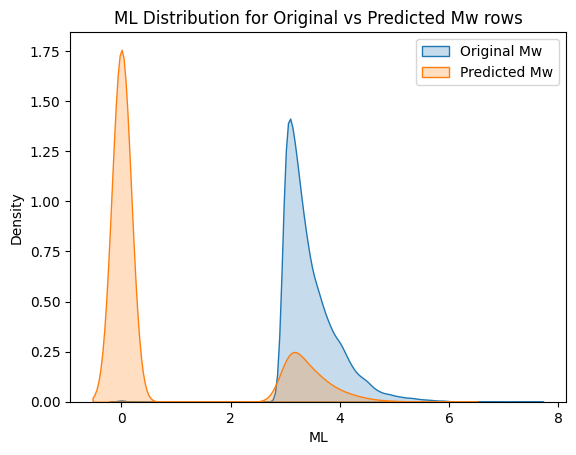

Text(0.5, 1.0, 'Depth vs ML - Colored by Predicted vs Original Mw')

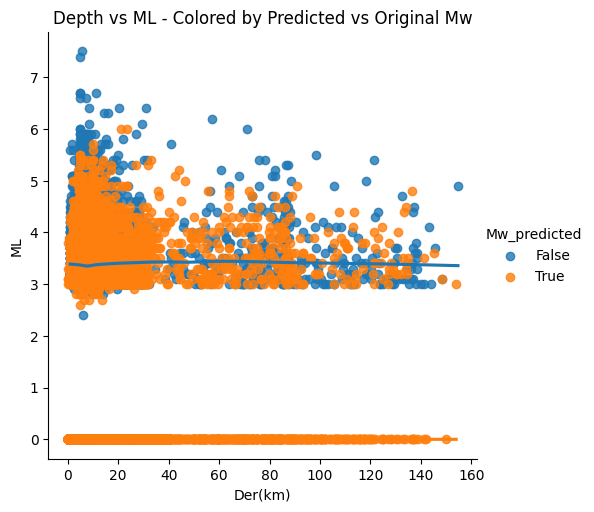

In [32]:
sns.kdeplot(data=original_mw, x='ML', label='Original Mw', fill=True)
sns.kdeplot(data=predicted_mw, x='ML', label='Predicted Mw', fill=True)
plt.title("ML Distribution for Original vs Predicted Mw rows")
plt.legend()
plt.show()

sns.lmplot(data=df_filled, x='Der(km)', y='ML', hue='Mw_predicted', lowess=True)
plt.title("Depth vs ML - Colored by Predicted vs Original Mw")


In [33]:
print("Original Correlation (Mw vs ML):", original_mw[['Mw', 'ML']].corr().iloc[0, 1])
print("Predicted Correlation (Mw vs ML):", predicted_mw[['Mw', 'ML']].corr().iloc[0, 1])


Original Correlation (Mw vs ML): 0.33485364776624954
Predicted Correlation (Mw vs ML): 0.24536813564820364


<Axes: title={'center': 'Average Mw Over Years (Original vs Predicted)'}, xlabel='Year'>

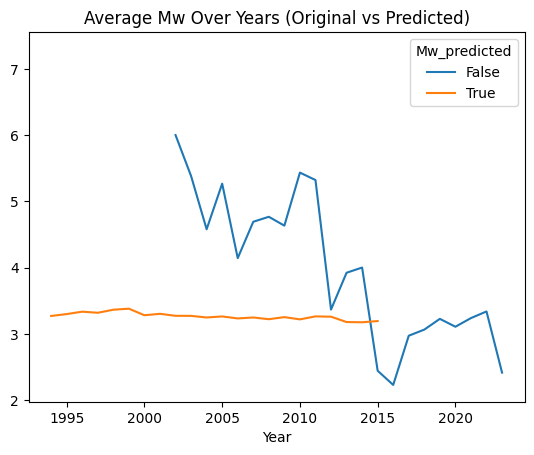

In [34]:
df_filled['Year'] = pd.to_datetime(df_filled['timestamp']).dt.year

# Group by year and prediction flag
trend = df_filled.groupby(['Year', 'Mw_predicted'])['Mw'].mean().unstack()
trend.plot(title='Average Mw Over Years (Original vs Predicted)')


<Axes: title={'center': 'Top 10 Locations: Avg Mw (Original vs Predicted)'}, xlabel='Yer'>

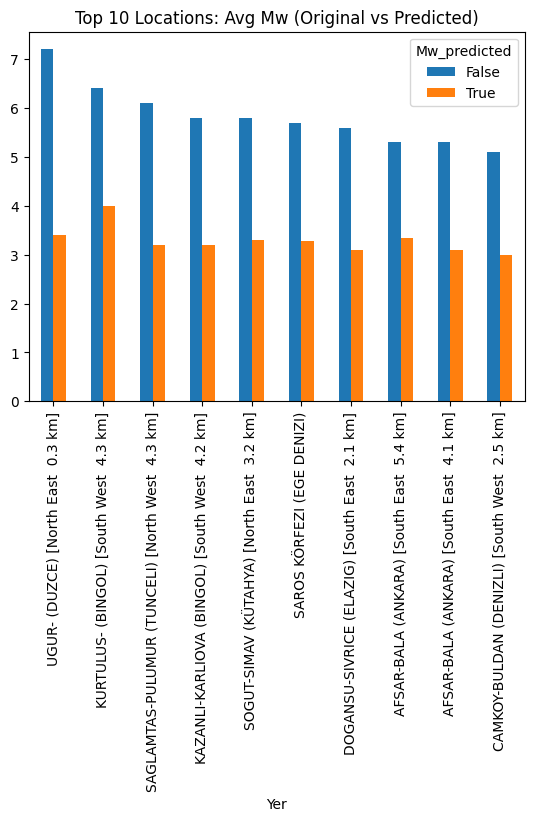

In [39]:
city_avg = df_filled.groupby(['Yer', 'Mw_predicted'])['Mw'].mean().unstack().dropna().sort_values(by=False, ascending=False).head(10)
city_avg.plot(kind='bar', title='Top 10 Locations: Avg Mw (Original vs Predicted)')


**As we see it is a good model but we can make it better by removing the outliers before feeding it into our trained model**

In [38]:


# Step 1: Ensure numeric format
df_filled['Mw'] = pd.to_numeric(df_filled['Mw'], errors='coerce')
df_filled['ML'] = pd.to_numeric(df_filled['ML'], errors='coerce')
df_filled['xM'] = pd.to_numeric(df_filled['xM'], errors='coerce')
df_filled['MD'] = pd.to_numeric(df_filled['MD'], errors='coerce')

# Step 2: Filter training data: remove rows with low ML or xM
df_filled_train = df_filled[(df_filled['Mw'].notnull()) & (df_filled['Mw'] != 0) &
              (df_filled['ML'] >= 2) & (df_filled['xM'] >= 2)& (df_filled['MD'] >= 2)]

# Step 3: Define features and target
X = df_filled_train[['ML', 'xM','MD']]
y = df_filled_train['Mw']

# Step 4: Split and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ New RMSE: {rmse:.4f}")
print(f"✅ New R² Score: {r2:.4f}")
print(f"✅ Accuracy: {r2 * 100:.2f}%")

# Step 6: Create a copy for filling
df_filled2 = df.copy()

# Step 7: Predict missing Mw where ML and xM are available and ≥ 2
mask = df_filled2['Mw'].isnull() & df_filled2['ML'].notnull() & df_filled2['xM'].notnull()& df_filled2['MD'].notnull()
mask = mask & (df_filled2['ML'] >= 2) & (df_filled2['xM'] >= 2)

X_missing = df_filled2.loc[mask, ['ML', 'xM','MD']]
df_filled2.loc[mask, 'Mw'] = model.predict(X_missing)

# Step 8: Mark predicted values
df_filled2['Mw_predicted'] = False
df_filled2.loc[mask, 'Mw_predicted'] = True


✅ New RMSE: 0.0216
✅ New R² Score: 0.9976
✅ Accuracy: 99.76%


As we see we have increased the R^2 score a little bit

Original Mw Mean: 2.87746511627907
Original Mw Std: 1.4098861048103521
All Mw Mean: 3.0610073335814354
All Mw Std: 1.151404916033726


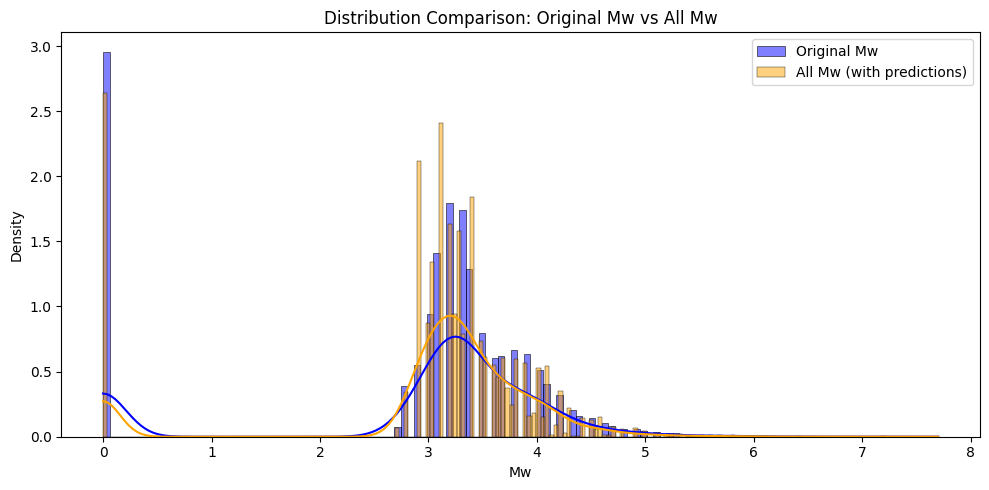

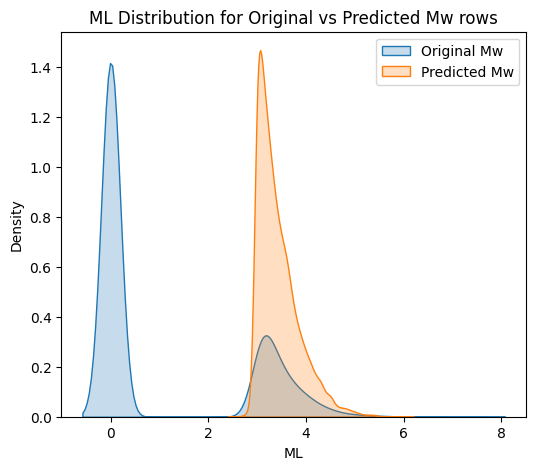

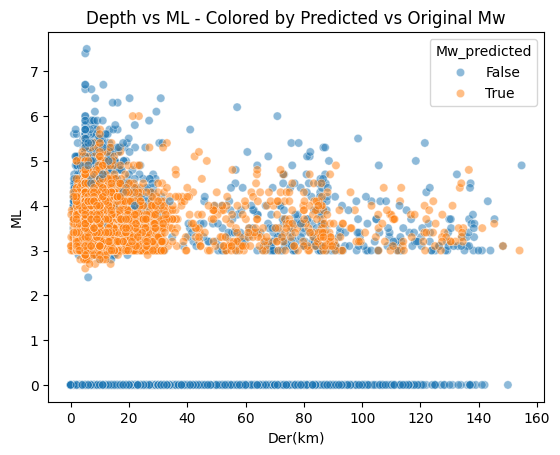

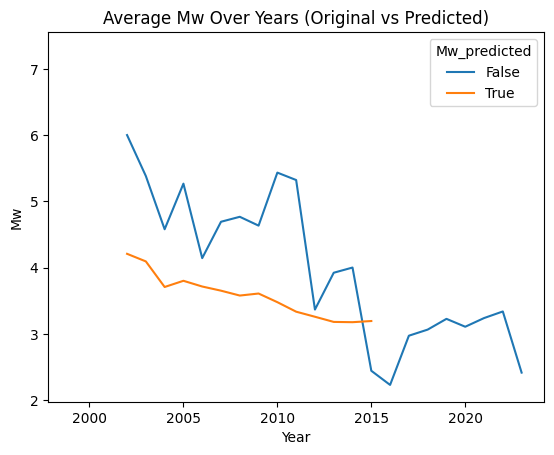

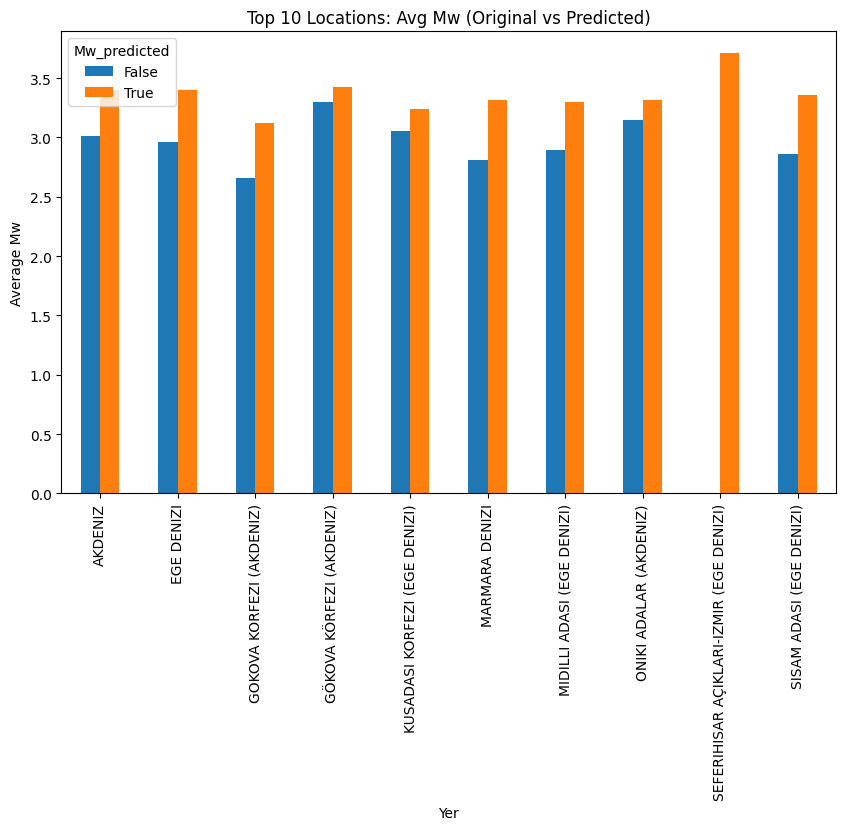

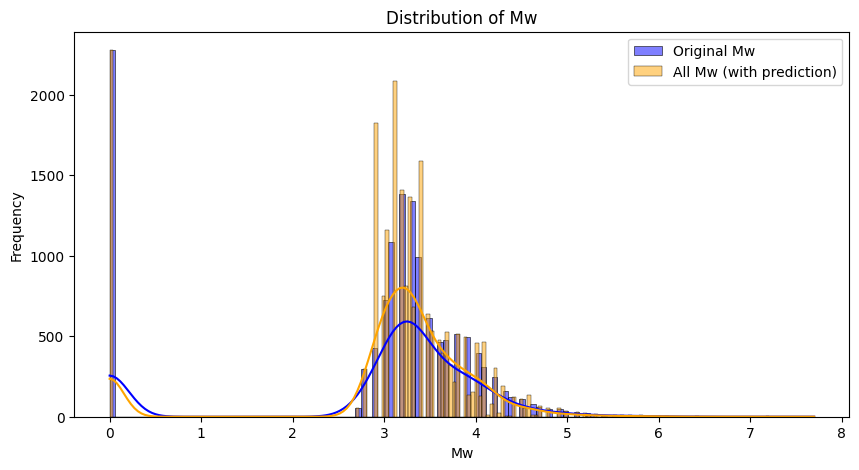

P-value: 0.2072850007205347


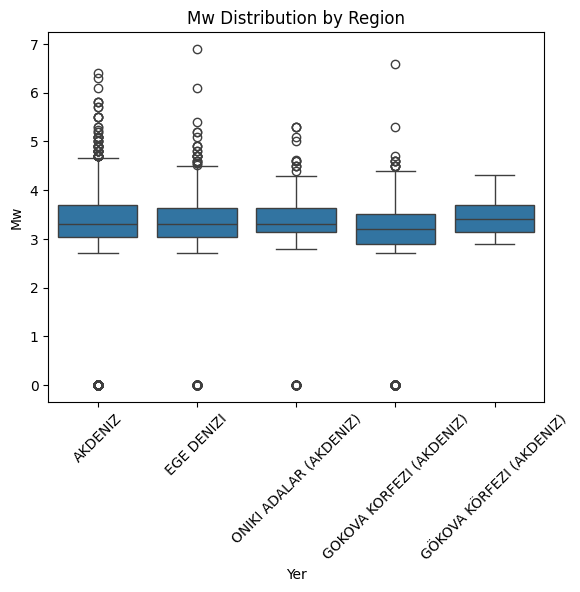

In [40]:
original_mw = df[df['Mw'].notnull()]

all_mw = df_filled2[df_filled2['Mw'].notnull()]

print("Original Mw Mean:", original_mw['Mw'].mean())
print("Original Mw Std:", original_mw['Mw'].std())

print("All Mw Mean:", all_mw['Mw'].mean())
print("All Mw Std:", all_mw['Mw'].std())


plt.figure(figsize=(10, 5))
sns.histplot(original_mw['Mw'], color='blue', label='Original Mw', kde=True, stat='density')
sns.histplot(all_mw['Mw'], color='orange', label='All Mw (with predictions)', kde=True, stat='density')
plt.title("Distribution Comparison: Original Mw vs All Mw")
plt.xlabel("Mw")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()



# Split data into predicted vs original Mw
original_mw = df_filled2[df_filled2['Mw_predicted'] == False]
predicted_mw = df_filled2[df_filled2['Mw_predicted'] == True]



plt.figure(figsize=(6, 5))
sns.kdeplot(data=original_mw, x='ML', label='Original Mw', fill=True)
sns.kdeplot(data=predicted_mw, x='ML', label='Predicted Mw', fill=True)
plt.title("ML Distribution for Original vs Predicted Mw rows")
plt.legend()
plt.show()

# 2. Depth vs ML Scatter Plot
sns.scatterplot(data=df_filled2, x='Der(km)', y='ML', hue='Mw_predicted', alpha=0.5)
plt.title("Depth vs ML - Colored by Predicted vs Original Mw")
plt.show()

# 3. Average Mw Over Years
df_filled2['Year'] = pd.to_datetime(df_filled2['timestamp']).dt.year
trend = df_filled2.groupby(['Year', 'Mw_predicted'])['Mw'].mean().unstack()
trend.plot(title='Average Mw Over Years (Original vs Predicted)')
plt.ylabel('Mw')
plt.show()

# 4. Top 10 Locations by Average Mw
top_locs = df_filled2['Yer'].value_counts().head(10).index
city_avg = df_filled2[df_filled2['Yer'].isin(top_locs)].groupby(['Yer', 'Mw_predicted'])['Mw'].mean().unstack()
city_avg.plot(kind='bar', title='Top 10 Locations: Avg Mw (Original vs Predicted)', figsize=(10,6))
plt.ylabel('Average Mw')
plt.show()




# Filter only rows with non-null Mw from original data
mw = df[df["Mw"].notnull()]

plt.figure(figsize=(10, 5))
sns.histplot(mw['Mw'], label='Original Mw', color='blue', kde=True)
sns.histplot(df_filled2['Mw'], label='All Mw (with prediction)', color='orange', kde=True)
plt.title("Distribution of Mw")
plt.xlabel("Mw")
plt.ylabel("Frequency")
plt.legend()
plt.show()




df_test = df_filled2.dropna(subset=['Mw', 'Der(km)'])
shallow = df_test[df_test['Der(km)'] <= 15]['Mw']
deep = df_test[df_test['Der(km)'] > 15]['Mw']

t_stat, p_val = ttest_ind(shallow, deep, equal_var=False)
print("P-value:", p_val)

top_regions = df_filled2['Yer'].value_counts().head(5).index
sns.boxplot(data=df_filled2[df_filled2['Yer'].isin(top_regions)], x='Yer', y='Mw')
plt.title("Mw Distribution by Region")
plt.xticks(rotation=45)
plt.show()


Here we try to compare the analizes with the data of the MW(original) and the MW all(original and predicted)

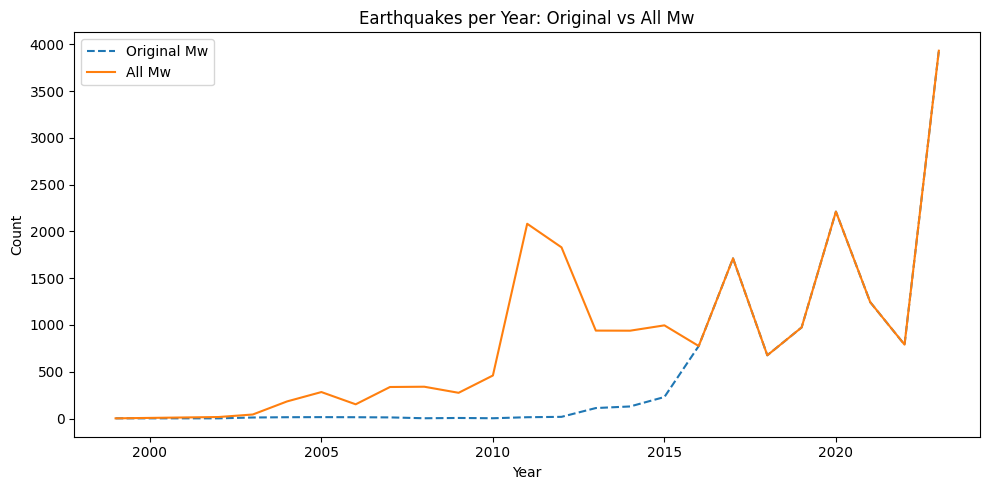

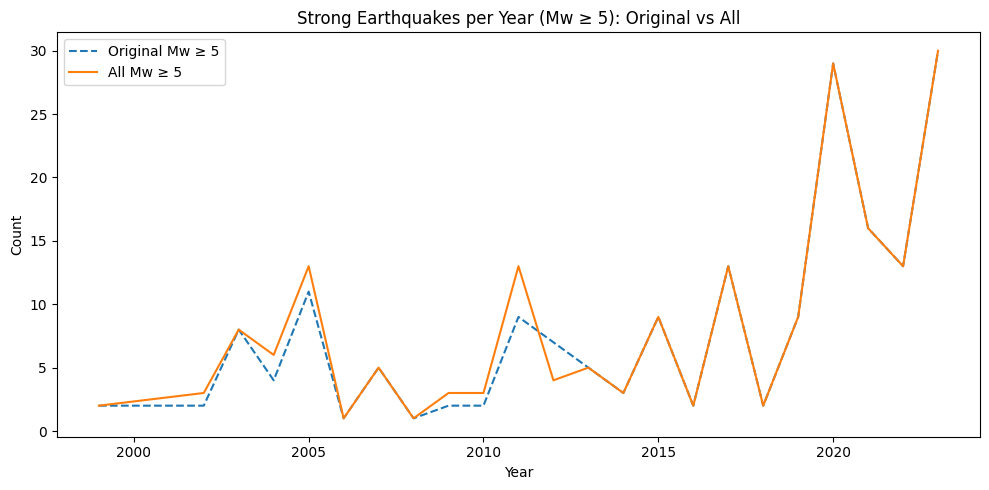

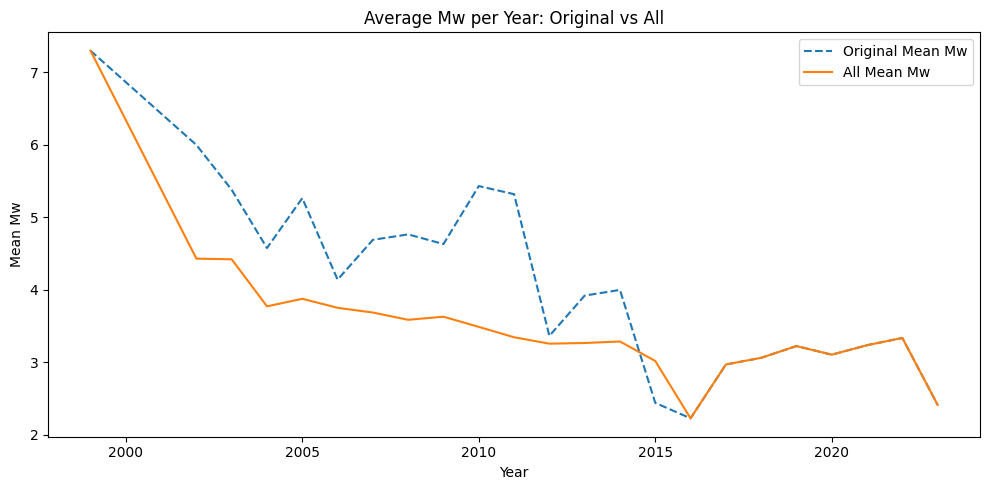

In [41]:


# Create two datasets
original_only = df[df['Mw'].notnull()].copy()
full_data = df_filled2[df_filled2['Mw'].notnull()].copy()

# Make sure timestamp is datetime
for dataset in [original_only, full_data]:
    dataset['timestamp'] = pd.to_datetime(dataset['timestamp'], errors='coerce')
    dataset['Year'] = dataset['timestamp'].dt.year
    dataset['Hour'] = dataset['timestamp'].dt.hour

# 1. Earthquake Frequency per Year
plt.figure(figsize=(10, 5))
original_only['Year'].value_counts().sort_index().plot(label='Original Mw', linestyle='--')
full_data['Year'].value_counts().sort_index().plot(label='All Mw', linestyle='-')
plt.title("Earthquakes per Year: Original vs All Mw")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

# 2. Strong Earthquakes (Mw ≥ 5) per Year
plt.figure(figsize=(10, 5))
original_only[original_only['Mw'] >= 5].groupby('Year')['Mw'].count().plot(label='Original Mw ≥ 5', linestyle='--')
full_data[full_data['Mw'] >= 5].groupby('Year')['Mw'].count().plot(label='All Mw ≥ 5', linestyle='-')
plt.title("Strong Earthquakes per Year (Mw ≥ 5): Original vs All")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

# compare mean between all MW(original and predicted) with only the MW original
original_mean = original_only.groupby('Year')['Mw'].mean()
full_mean = full_data.groupby('Year')['Mw'].mean()

plt.figure(figsize=(10, 5))
original_mean.plot(label='Original Mean Mw', linestyle='--')
full_mean.plot(label='All Mean Mw', linestyle='-')
plt.title("Average Mw per Year: Original vs All")
plt.xlabel("Year")
plt.ylabel("Mean Mw")
plt.legend()
plt.tight_layout()
plt.show()



# Analayzing data

Applying some hepoth to make sure about our predicted data

In [42]:

# Select top 5 locations with most data
top_locations = df_filled2['Yer'].value_counts().head(5).index

# Filter only those locations and drop missing Mw
regional_data = df_filled2[df_filled2['Yer'].isin(top_locations)].dropna(subset=['Mw'])

# Group Mw values by region
groups = [group['Mw'] for name, group in regional_data.groupby('Yer')]

# Perform ANOVA
f_stat, p_val = f_oneway(*groups)

print("F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("❗ Reject H₀: Significant difference in Mw between regions.")
else:
    print("✅ Fail to reject H₀: No significant difference in Mw between regions.")


F-statistic: 20.50514036783348
P-value: 9.576420530706799e-17
❗ Reject H₀: Significant difference in Mw between regions.


In [44]:

# Simplify locations to top 5 most frequent
top_locations = df_filled2['Yer'].value_counts().head(5).index
df_region = df_filled2[df_filled2['Yer'].isin(top_locations)]

# Group Mw values by region
groups = [group['Mw'].dropna() for name, group in df_region.groupby('Yer')]

# One-way ANOVA
f_stat, p_value = f_oneway(*groups)

print("F-Statistic:", f_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("❗ Reject H₀: There is a significant difference in Mw between regions.")
else:
    print("✅ Fail to reject H₀: No significant difference in Mw between regions.")


F-Statistic: 20.50514036783348
P-Value: 9.576420530706799e-17
❗ Reject H₀: There is a significant difference in Mw between regions.


In [45]:

# Drop missing Mw or depth values
df_test = df_filled2.dropna(subset=['Mw', 'Der(km)'])

# Define shallow and deep groups
shallow = df_test[df_test['Der(km)'] <= 15]['Mw']
deep = df_test[df_test['Der(km)'] > 15]['Mw']

# Run independent t-test
t_stat, p_value = ttest_ind(shallow, deep, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("❗ Reject H₀: There is a significant difference in Mw between shallow and deep quakes.")
else:
    print("✅ Fail to reject H₀: No significant difference in Mw between shallow and deep quakes.")


T-Statistic: -1.2613625026348931
P-Value: 0.2072850007205347
✅ Fail to reject H₀: No significant difference in Mw between shallow and deep quakes.


**The top parts that have earthquakes**

In [46]:
top_locations = df_filled2['Yer'].value_counts().head(10)
print(top_locations)


Yer
AKDENIZ                                    4286
EGE DENIZI                                  983
ONIKI ADALAR (AKDENIZ)                      673
GÖKOVA KÖRFEZI (AKDENIZ)                    591
GOKOVA KORFEZI (AKDENIZ)                    499
SEFERIHISAR AÇIKLARI-IZMIR (EGE DENIZI)     440
MIDILLI ADASI (EGE DENIZI)                  429
SISAM ADASI (EGE DENIZI)                    357
KUSADASI KORFEZI (EGE DENIZI)               340
MARMARA DENIZI                              307
Name: count, dtype: int64


**📊 2. Which magnitudes are most common? (Histogram)**


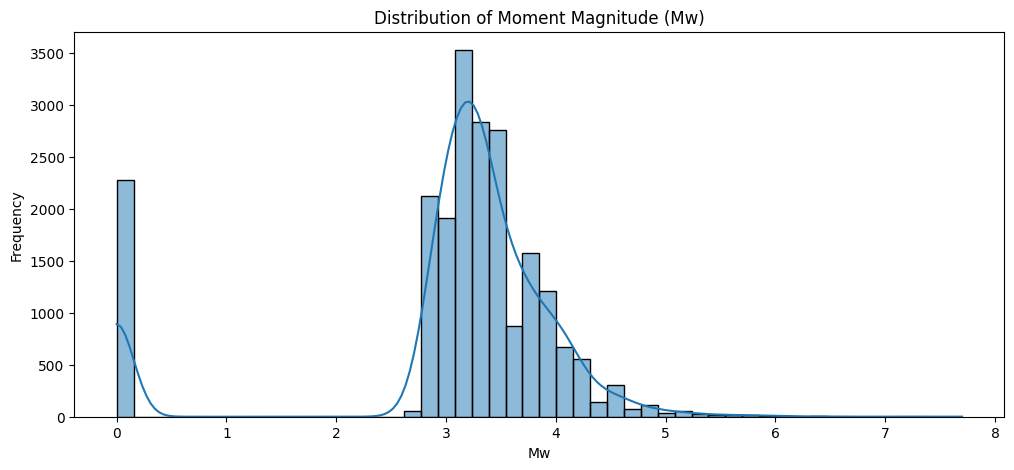

In [47]:
plt.figure(figsize=(12, 5))
sns.histplot(df_filled2['Mw'], bins=50, kde=True)
plt.title('Distribution of Moment Magnitude (Mw)')
plt.xlabel('Mw')
plt.ylabel('Frequency')
plt.show()

 **The Deeper earthquakes have lower magnitude**

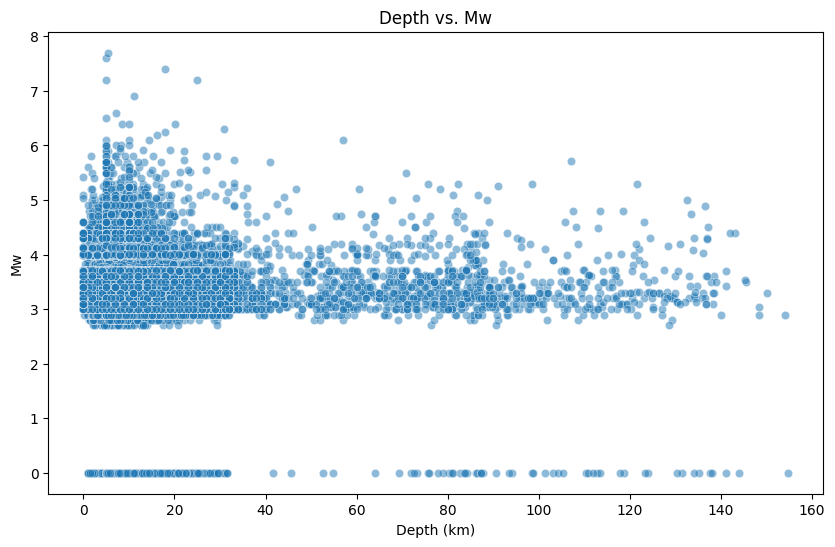

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filled, x='Der(km)', y='Mw', alpha=0.5)
plt.title('Depth vs. Mw')
plt.xlabel('Depth (km)')
plt.ylabel('Mw')
plt.show()


*Creating a map of where the earthquack had happened according to the dataset*

In [49]:
# Create map centered on Turkey
map_eq = folium.Map(location=[39.0, 35.0], zoom_start=6)
marker_cluster = MarkerCluster().add_to(map_eq)

# Add markers
for _, row in df_filled2.dropna(subset=['Enlem', 'Boylam']).iterrows():
    folium.CircleMarker(
        location=[row['Enlem'], row['Boylam']],
        radius=2,
        popup=f"Mw: {row['Mw']}",
        color='red' if row['Mw'] >= 5 else 'blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(marker_cluster)

map_eq.save("turkey_earthquakes_map.html")

<Axes: title={'center': 'Top 10 Affected Cities'}, xlabel='City'>

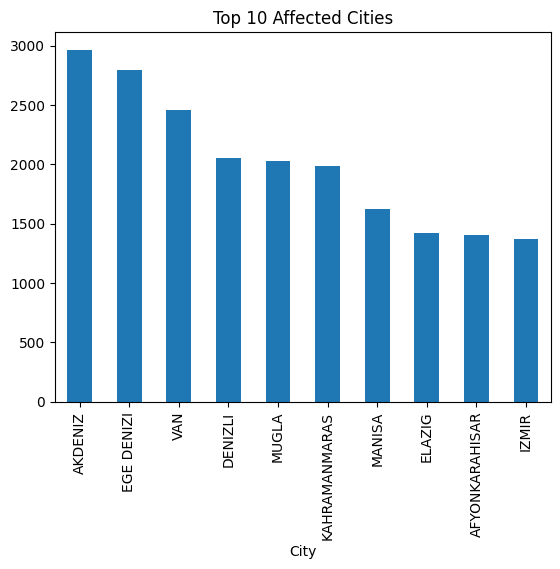

In [50]:
df_filled['City'] = df_filled['Yer'].str.extract(r'\((.*?)\)')  # Extracts city from (CITY)
df_filled['City'].value_counts().head(10).plot(kind='bar', title='Top 10 Affected Cities')




***Number of Earthquakes per Year***

<Axes: title={'center': 'Number of Earthquakes per Year'}, xlabel='Year'>

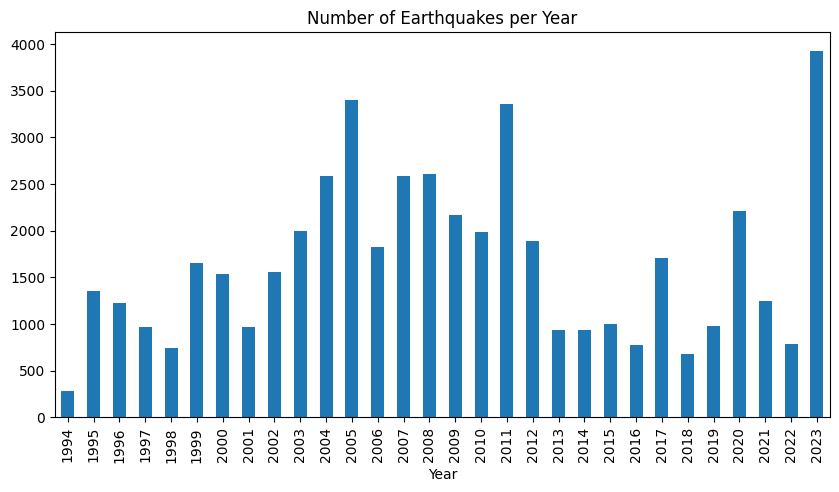

In [51]:
df_filled2['Year'] = pd.to_datetime(df_filled2['timestamp']).dt.year
df_filled2['Year'].value_counts().sort_index().plot(kind='bar', figsize=(10,5), title='Number of Earthquakes per Year')


**Strong Eathquakes**

<Axes: title={'center': 'Strong Earthquakes (Mw ≥ 5) per Year'}, xlabel='Year'>

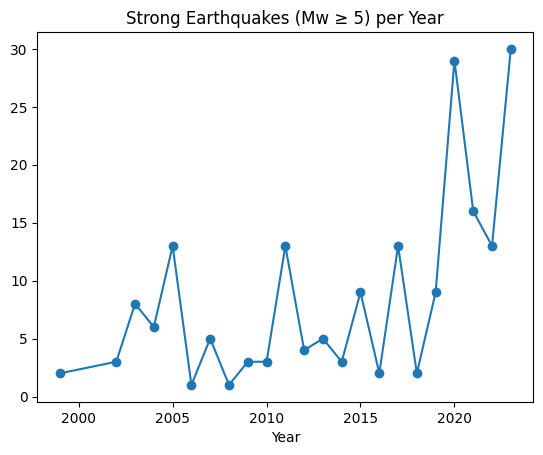

In [52]:
df_filled2[df_filled2['Mw'] >= 5].groupby('Year')['Mw'].count().plot(kind='line', marker='o', title='Strong Earthquakes (Mw ≥ 5) per Year')
